In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
from datasets import load_dataset_builder
    
    # Get dataset info
ds_builder = load_dataset_builder("cifar10")
ds_builder.info


DatasetInfo(description='', citation='', homepage='', license='', features={'img': Image(mode=None, decode=True), 'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])}, post_processed=None, supervised_keys=None, builder_name='parquet', dataset_name='cifar10', config_name='plain_text', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=113648310.0, num_examples=50000, shard_lengths=None, dataset_name=None), 'test': SplitInfo(name='test', num_bytes=22731580.0, num_examples=10000, shard_lengths=None, dataset_name=None)}, download_checksums=None, download_size=143646105, post_processing_size=None, dataset_size=136379890.0, size_in_bytes=None)

In [5]:
print(Y_train.shape, Y_train[0])
print(Y_test.shape, Y_test[0])

(50000, 1) [6]
(10000, 1) [3]


In [6]:
# Normalize (0-1 range)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [7]:
# One-hot encode labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [8]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\shubham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
model.fit(X_train, Y_train, epochs=3, batch_size=64, verbose=1)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.3563 - loss: 1.7568
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.5589 - loss: 1.2374
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6241 - loss: 1.0818


In [11]:
# Prediction on random image
# ---------------------------
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [18]:
idx = random.randint(0, len(X_test)-1)  # random test index
test_img = X_test[idx].reshape(1,32,32,3)

In [19]:
pred = model.predict(test_img)
predicted_label = np.argmax(pred)
true_label = np.argmax(Y_test[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


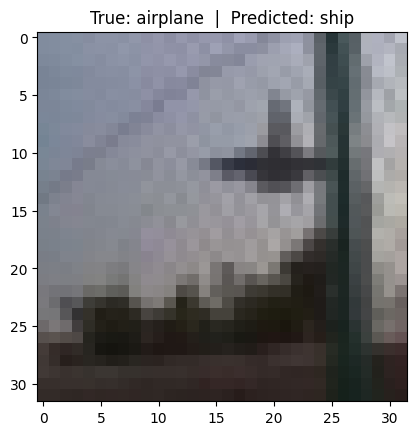

In [20]:
# Show image with prediction
plt.imshow(X_test[idx])
plt.title(f"True: {class_names[true_label]}  |  Predicted: {class_names[predicted_label]}")
plt.show()